# Chapter 7: Common Discrete Distributions

In the previous chapter, we defined discrete random variables and learned how to describe their behavior using Probability Mass Functions (PMFs), Cumulative Distribution Functions (CDFs), expected value, and variance. While we can define custom PMFs for any situation, several specific discrete distributions appear so frequently in practice that they have been studied extensively and given names.

These "common" distributions serve as powerful models for a wide variety of real-world processes. Understanding their properties and when to apply them is crucial for probabilistic modeling. In this chapter, we will explore the most important discrete distributions: Bernoulli, Binomial, Geometric, Negative Binomial, Poisson, and Hypergeometric.

We'll examine the scenarios each distribution models, their key characteristics (PMF, mean, variance), and how to work with them efficiently using Python's `scipy.stats` library. This library provides tools to calculate probabilities (PMF, CDF), generate random samples, and more, significantly simplifying our practical work.

Let's import the necessary libraries first.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Bernoulli Distribution

The Bernoulli distribution is the simplest discrete distribution. It models a single trial with only two possible outcomes, often labeled "success" (usually encoded as 1) and "failure" (usually encoded as 0).

- **Scenario**: A single coin flip (Heads/Tails), a single product inspection (Defective/Not Defective), a single customer interaction (Purchase/No Purchase).
- **Parameter**: $p$, the probability of success ($0 \le p \le 1$). The probability of failure is then $q = 1-p$.
- **Random Variable**: $X$ takes value 1 (success) with probability $p$, and 0 (failure) with probability $1-p$.

**PMF:**

$$ P(X=k) = \begin{cases} p & \text{if } k=1 \\ 1-p & \text{if } k=0 \\ 0 & \text{otherwise} \end{cases} $$

This can be written concisely as:

$$ P(X=k) = p^k (1-p)^{1-k} \quad \text{for } k \in \{0, 1\} $$

**Mean (Expected Value):** $E[X] = p$
**Variance:** $Var(X) = p(1-p)$

**Example:** Modeling the outcome of a single customer purchase where the probability of purchase ($p$) is 0.1.

In [3]:
# Using scipy.stats.bernoulli
p_purchase = 0.1
bernoulli_rv = stats.bernoulli(p=p_purchase)

In [4]:
# PMF: Probability of success (k=1) and failure (k=0)
print(f"P(X=1) (Purchase): {bernoulli_rv.pmf(1):.2f}")
print(f"P(X=0) (No Purchase): {bernoulli_rv.pmf(0):.2f}")

P(X=1) (Purchase): 0.10
P(X=0) (No Purchase): 0.90


In [5]:
# Mean and Variance
print(f"Mean (Expected Value): {bernoulli_rv.mean():.2f}")
print(f"Variance: {bernoulli_rv.var():.2f}")

Mean (Expected Value): 0.10
Variance: 0.09


In [6]:
# Generate random samples
n_samples = 10
samples = bernoulli_rv.rvs(size=n_samples)
print(f"\n{n_samples} simulated customer outcomes (1=Purchase, 0=No Purchase): {samples}")


10 simulated customer outcomes (1=Purchase, 0=No Purchase): [0 0 0 0 0 0 0 0 0 0]


In [7]:
# Plotting the PMF
k_values = [0, 1]
pmf_values = bernoulli_rv.pmf(k_values)

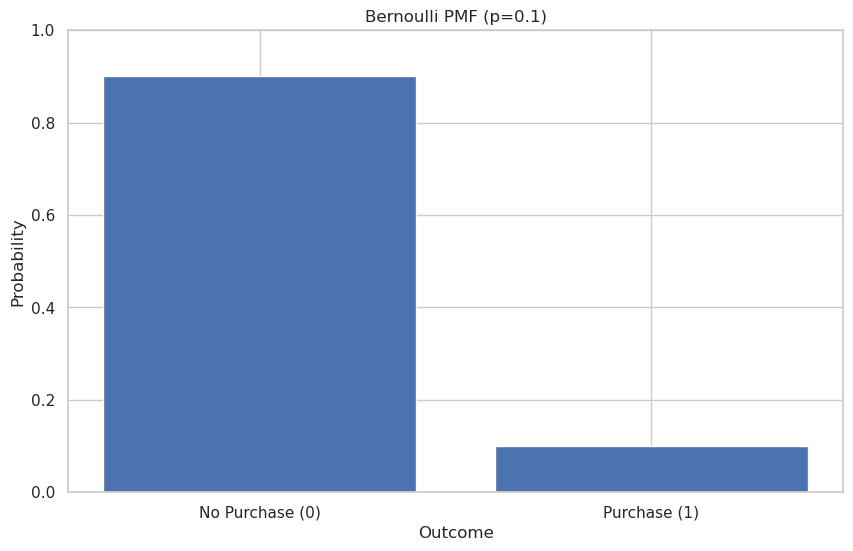

In [8]:
plt.bar(k_values, pmf_values, tick_label=["No Purchase (0)", "Purchase (1)"])
plt.title(f"Bernoulli PMF (p={p_purchase})")
plt.xlabel("Outcome")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.show()

## 2. Binomial Distribution

The Binomial distribution models the number of successes in a *fixed number* of independent Bernoulli trials, where each trial has the same probability of success.

- **Scenario**: The number of heads in 10 coin flips, the number of defective items in a batch of 50, the number of successful sales calls out of 20 made.
- **Parameters**:
    - $n$: the number of independent trials.
    - $p$: the probability of success on each trial ($0 \le p \le 1$).
- **Random Variable**: $X$, the total number of successes in $n$ trials. $X$ can take values $k = 0, 1, 2, ..., n$.

**PMF:**
The probability of getting exactly $k$ successes in $n$ trials is given by:

$$ P(X=k) = \binom{n}{k} p^k (1-p)^{n-k} \quad \text{for } k = 0, 1, \dots, n $$

where $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the binomial coefficient, representing the number of ways to choose $k$ successes from $n$ trials.

**Mean:** $E[X] = np$
**Variance:** $Var(X) = np(1-p)$

**Example:** Modeling the number of successful sales calls out of $n=20$, if the probability of success ($p$) for each call is 0.15.

In [9]:
# Using scipy.stats.binom
n_calls = 20
p_success_call = 0.15
binomial_rv = stats.binom(n=n_calls, p=p_success_call)

In [10]:
# PMF: Probability of exactly k successes
k_successes = 5
print(f"P(X={k_successes} successes out of {n_calls}): {binomial_rv.pmf(k_successes):.4f}")

P(X=5 successes out of 20): 0.1028


In [11]:
# CDF: Probability of k or fewer successes
k_or_fewer = 3
print(f"P(X <= {k_or_fewer} successes out of {n_calls}): {binomial_rv.cdf(k_or_fewer):.4f}")
# Probability of more than k successes
print(f"P(X > {k_or_fewer} successes out of {n_calls}): {1 - binomial_rv.cdf(k_or_fewer):.4f}")
# Or using the survival function (sf): P(X > k)
print(f"P(X > {k_or_fewer} successes out of {n_calls}) (using sf): {binomial_rv.sf(k_or_fewer):.4f}")

P(X <= 3 successes out of 20): 0.6477
P(X > 3 successes out of 20): 0.3523
P(X > 3 successes out of 20) (using sf): 0.3523


In [12]:
# Mean and Variance
print(f"\nMean (Expected number of successes): {binomial_rv.mean():.2f}")
print(f"Variance: {binomial_rv.var():.2f}")
print(f"Standard Deviation: {binomial_rv.std():.2f}")


Mean (Expected number of successes): 3.00
Variance: 2.55
Standard Deviation: 1.60


In [13]:
# Generate random samples
n_simulations = 1000
samples = binomial_rv.rvs(size=n_simulations)
# print(f"\nSimulated number of successes in {n_calls} calls ({n_simulations} simulations): {samples[:20]}...") # Print first 20

In [14]:
# Plotting the PMF
k_values = np.arange(0, n_calls + 1)
pmf_values = binomial_rv.pmf(k_values)

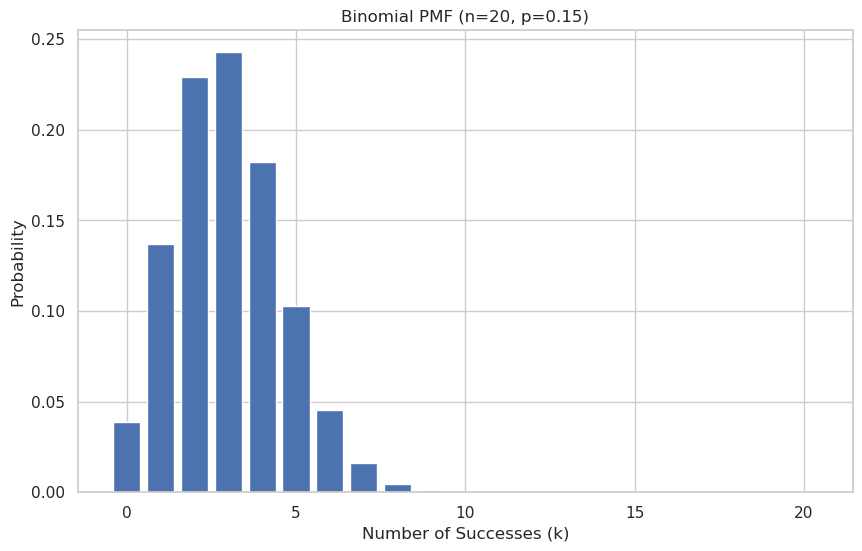

In [15]:
plt.bar(k_values, pmf_values)
plt.title(f"Binomial PMF (n={n_calls}, p={p_success_call})")
plt.xlabel("Number of Successes (k)")
plt.ylabel("Probability")
plt.show()

In [16]:
# Plotting the CDF
cdf_values = binomial_rv.cdf(k_values)

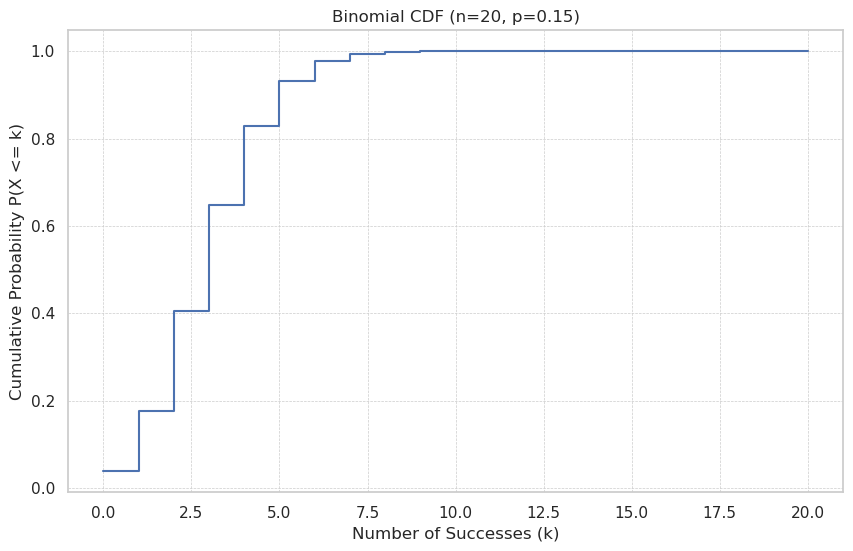

In [17]:
plt.step(k_values, cdf_values, where='post')
plt.title(f"Binomial CDF (n={n_calls}, p={p_success_call})")
plt.xlabel("Number of Successes (k)")
plt.ylabel("Cumulative Probability P(X <= k)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## 3. Geometric Distribution

The Geometric distribution models the number of independent Bernoulli trials needed to get the *first* success.

- **Scenario**: The number of coin flips until the first Head appears, the number of job applications until the first interview offer, the number of attempts needed to pass a certification exam.
- **Parameter**: $p$, the probability of success on each trial ($0 < p \le 1$).
- **Random Variable**: $X$, the number of trials required to achieve the first success. $X$ can take values $k = 1, 2, 3, ...$.

**PMF:**
The probability that the first success occurs on the $k$-th trial is:

$$ P(X=k) = (1-p)^{k-1} p \quad \text{for } k = 1, 2, 3, \dots $$

This means we have $k-1$ failures followed by one success.

**Mean:** $E[X] = \frac{1}{p}$
**Variance:** $Var(X) = \frac{1-p}{p^2}$

*Note*: `scipy.stats.geom` defines $k$ as the number of *failures before* the first success ($k=0, 1, 2, ...$). This shifts the distribution by 1 compared to the definition above where $k$ is the trial number ($k=1, 2, 3, ...$). We'll use the `scipy` definition ($k=0, 1, 2, ...$) in the code examples, but state results in terms of the trial number ($k+1$).

**Example:** Modeling the number of attempts needed to pass a certification exam, where the probability of passing ($p$) on any given attempt is 0.6.

In [18]:
# Using scipy.stats.geom
p_pass = 0.6
geom_rv = stats.geom(p=p_pass)

In [19]:
# PMF: Probability that the first success occurs on trial k (k=1, 2, ...)
# Using scipy: geom_rv.pmf(k-1)
k_trial = 3 # Third attempt
print(f"P(First pass on attempt {k_trial}): {geom_rv.pmf(k_trial - 1):.4f}")

P(First pass on attempt 3): 0.2400


In [20]:
# CDF: Probability that the first success occurs on or before trial k
# Using scipy: geom_rv.cdf(k-1)
k_or_before = 2
print(f"P(First pass on or before attempt {k_or_before}): {geom_rv.cdf(k_or_before - 1):.4f}")
# Probability it takes more than k trials
print(f"P(First pass takes more than {k_or_before} attempts): {1 - geom_rv.cdf(k_or_before - 1):.4f}")
print(f"P(First pass takes more than {k_or_before} attempts) (using sf): {geom_rv.sf(k_or_before - 1):.4f}")

P(First pass on or before attempt 2): 0.6000
P(First pass takes more than 2 attempts): 0.4000
P(First pass takes more than 2 attempts) (using sf): 0.4000


In [21]:
# Mean and Variance (based on scipy's definition k=0, 1, 2...)
# E[Failures before success] = (1-p)/p
# Var[Failures before success] = (1-p)/p^2
mean_scipy = geom_rv.mean()
var_scipy = geom_rv.var()
print(f"\nMean number of failures before success (scipy): {mean_scipy:.2f}")
print(f"Variance of failures before success (scipy): {var_scipy:.2f}")


Mean number of failures before success (scipy): 1.67
Variance of failures before success (scipy): 1.11


In [22]:
# Mean and Variance (based on our definition k=1, 2, 3...)
# E[Trial number of first success] = 1/p = E[Failures] + 1
# Var[Trial number of first success] = (1-p)/p^2 = Var[Failures]
mean_trials = 1 / p_pass
var_trials = (1 - p_pass) / p_pass**2
print(f"Mean number of attempts until first pass: {mean_trials:.2f}")
print(f"Variance of number of attempts: {var_trials:.2f}")

Mean number of attempts until first pass: 1.67
Variance of number of attempts: 1.11


In [23]:
# Generate random samples (number of failures before first success)
n_simulations = 1000
samples_failures = geom_rv.rvs(size=n_simulations)
# Convert to trial number (failures + 1)
samples_trials = samples_failures + 1
# print(f"\nSimulated number of attempts until first pass ({n_simulations} simulations): {samples_trials[:20]}...")

In [24]:
# Plotting the PMF (using trial number k=1, 2, ...)
k_values_trials = np.arange(1, 11) # Plot first 10 trials
pmf_values = geom_rv.pmf(k_values_trials - 1) # Adjust k for scipy

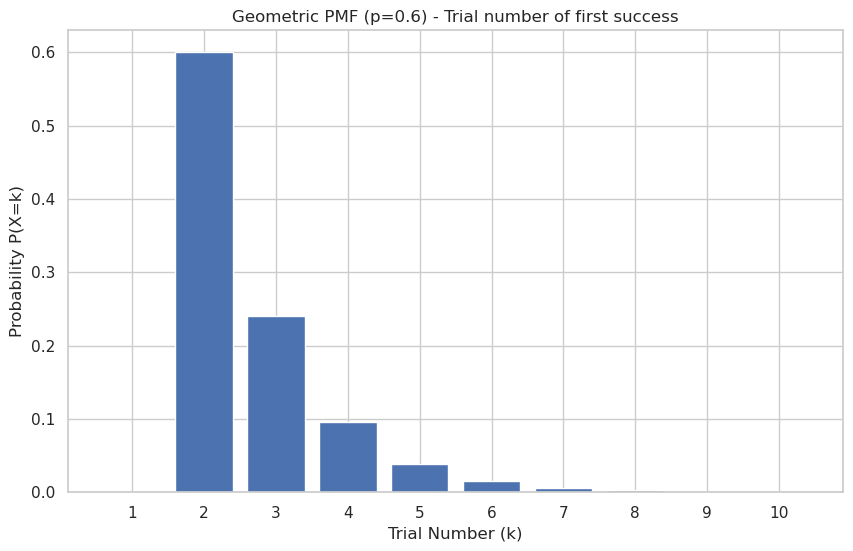

In [25]:
plt.bar(k_values_trials, pmf_values)
plt.title(f"Geometric PMF (p={p_pass}) - Trial number of first success")
plt.xlabel("Trial Number (k)")
plt.ylabel("Probability P(X=k)")
plt.xticks(k_values_trials)
plt.show()

## 4. Negative Binomial Distribution

The Negative Binomial distribution models the number of independent Bernoulli trials needed to achieve a *fixed number* of successes ($r$). It generalizes the Geometric distribution (where $r=1$).

- **Scenario**: The number of coin flips needed to get 5 Heads, the number of products to inspect to find 3 defective items, the number of sales calls needed to achieve 5 successful sales.
- **Parameters**:
    - $r$: the target number of successes ($r \ge 1$).
    - $p$: the probability of success on each trial ($0 < p \le 1$).
- **Random Variable**: $X$, the total number of trials required to achieve $r$ successes. $X$ can take values $k = r, r+1, r+2, ...$.

**PMF:**
The probability that the $r$-th success occurs on the $k$-th trial is:

$$ P(X=k) = \binom{k-1}{r-1} p^r (1-p)^{k-r} \quad \text{for } k = r, r+1, r+2, \dots $$

This means we have $r-1$ successes in the first $k-1$ trials, and the $k$-th trial is the $r$-th success.

**Mean:** $E[X] = \frac{r}{p}$
**Variance:** $Var(X) = \frac{r(1-p)}{p^2}$

*Note*: Like `geom`, `scipy.stats.nbinom` defines the variable differently: it counts the number of *failures* ($k$) that occur before the $r$-th success. So, the total number of trials in our definition is $k + r$ in SciPy's terms. We'll use the `scipy` definition ($k=0, 1, 2, ...$ failures) in the code, stating results in terms of the total number of trials.

**Example:** Modeling the number of sales calls needed to achieve $r=5$ successful sales, if the probability of success ($p$) per call is 0.15.

In [26]:
# Using scipy.stats.nbinom
r_successes_target = 5
p_success_call = 0.15
nbinom_rv = stats.nbinom(n=r_successes_target, p=p_success_call)

In [27]:
# PMF: Probability of needing k trials to get r successes.
# This means k-r failures before the r-th success.
# Using scipy: nbinom_rv.pmf(k-r)
k_trials = 30 # Total trials
num_failures = k_trials - r_successes_target
if num_failures >= 0:
    prob_k_trials = nbinom_rv.pmf(num_failures)
    print(f"P(Need exactly {k_trials} trials for {r_successes_target} successes): {prob_k_trials:.4f}")
else:
    print(f"Cannot achieve {r_successes_target} successes in fewer than {r_successes_target} trials.")

P(Need exactly 30 trials for 5 successes): 0.0310


In [28]:
# CDF: Probability of needing k or fewer trials to get r successes.
# This means k-r or fewer failures before the r-th success.
# Using scipy: nbinom_rv.cdf(k-r)
k_or_fewer_trials = 40
num_failures_max = k_or_fewer_trials - r_successes_target
if num_failures_max >= 0:
    prob_k_or_fewer = nbinom_rv.cdf(num_failures_max)
    print(f"P(Need {k_or_fewer_trials} or fewer trials for {r_successes_target} successes): {prob_k_or_fewer:.4f}")
else:
    print(f"Cannot achieve {r_successes_target} successes in fewer than {r_successes_target} trials.")

P(Need 40 or fewer trials for 5 successes): 0.7367


In [29]:
# Mean and Variance (based on scipy's definition: number of failures)
# E[Failures before r successes] = r*(1-p)/p
# Var[Failures before r successes] = r*(1-p)/p^2
mean_failures_scipy = nbinom_rv.mean()
var_failures_scipy = nbinom_rv.var()
print(f"\nMean number of failures before {r_successes_target} successes (scipy): {mean_failures_scipy:.2f}")
print(f"Variance of failures before {r_successes_target} successes (scipy): {var_failures_scipy:.2f}")


Mean number of failures before 5 successes (scipy): 28.33
Variance of failures before 5 successes (scipy): 188.89


In [30]:
# Mean and Variance (based on our definition: total trials)
# E[Trials for r successes] = r/p = E[Failures] + r
# Var[Trials for r successes] = r(1-p)/p^2 = Var[Failures]
mean_trials_nb = r_successes_target / p_success_call
var_trials_nb = r_successes_target * (1 - p_success_call) / p_success_call**2
print(f"Mean number of trials for {r_successes_target} successes: {mean_trials_nb:.2f}")
print(f"Variance of number of trials: {var_trials_nb:.2f}")

Mean number of trials for 5 successes: 33.33
Variance of number of trials: 188.89


In [31]:
# Generate random samples (number of failures before r successes)
n_simulations = 1000
samples_failures_nb = nbinom_rv.rvs(size=n_simulations)
# Convert to total trials (failures + r)
samples_trials_nb = samples_failures_nb + r_successes_target
# print(f"\nSimulated trials needed for {r_successes_target} successes ({n_simulations} sims): {samples_trials_nb[:20]}...")

In [32]:
# Plotting the PMF (using total trial number k = r, r+1, ...)
k_values_trials_nb = np.arange(r_successes_target, r_successes_target + 100) # Plot a range of trials
pmf_values_nb = nbinom_rv.pmf(k_values_trials_nb - r_successes_target) # Adjust k for scipy

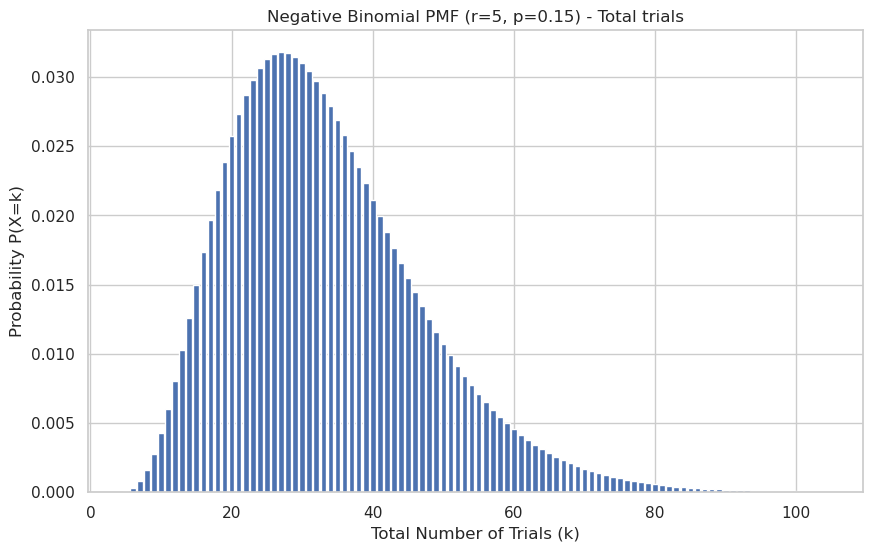

In [33]:
plt.bar(k_values_trials_nb, pmf_values_nb)
plt.title(f"Negative Binomial PMF (r={r_successes_target}, p={p_success_call}) - Total trials")
plt.xlabel("Total Number of Trials (k)")
plt.ylabel("Probability P(X=k)")
# plt.xticks(k_values_trials_nb[::5]) # Show fewer ticks if crowded
plt.show()

## 5. Poisson Distribution

The Poisson distribution models the number of events occurring in a fixed interval of time or space, given the average rate of occurrence, assuming events happen independently and at a constant average rate.

- **Scenario**: Number of emails received per hour, number of customer arrivals at a store per day, number of typos per page of a book, number of mutations in a DNA strand of a certain length.
- **Parameter**: $\lambda$ (lambda), the average number of events in the interval ($\lambda > 0$).
- **Random Variable**: $X$, the number of events in the interval. $X$ can take values $k = 0, 1, 2, ...$.

**PMF:**

$$ P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!} \quad \text{for } k = 0, 1, 2, \dots $$

where $e \approx 2.71828$ is Euler's number.

**Mean:** $E[X] = \lambda$
**Variance:** $Var(X) = \lambda$
Note: The mean and variance are equal in a Poisson distribution.

**Example:** Modeling the number of emails received per hour, if the average rate ($\lambda$) is 5 emails/hour.

In [34]:
# Using scipy.stats.poisson
lambda_rate = 5 # Average emails per hour
poisson_rv = stats.poisson(mu=lambda_rate) # mu is the symbol for lambda in scipy

In [35]:
# PMF: Probability of exactly k events
k_events = 3
print(f"P(X={k_events} emails in an hour | lambda={lambda_rate}): {poisson_rv.pmf(k_events):.4f}")

P(X=3 emails in an hour | lambda=5): 0.1404


In [36]:
# CDF: Probability of k or fewer events
k_or_fewer_events = 6
print(f"P(X <= {k_or_fewer_events} emails in an hour): {poisson_rv.cdf(k_or_fewer_events):.4f}")
# Probability of more than k events
print(f"P(X > {k_or_fewer_events} emails in an hour): {1 - poisson_rv.cdf(k_or_fewer_events):.4f}")
print(f"P(X > {k_or_fewer_events} emails in an hour) (using sf): {poisson_rv.sf(k_or_fewer_events):.4f}")

P(X <= 6 emails in an hour): 0.7622
P(X > 6 emails in an hour): 0.2378
P(X > 6 emails in an hour) (using sf): 0.2378


In [37]:
# Mean and Variance
print(f"\nMean (Expected number of emails): {poisson_rv.mean():.2f}")
print(f"Variance: {poisson_rv.var():.2f}")


Mean (Expected number of emails): 5.00
Variance: 5.00


In [38]:
# Generate random samples
n_simulations = 1000
samples = poisson_rv.rvs(size=n_simulations)
# print(f"\nSimulated number of emails per hour ({n_simulations} simulations): {samples[:20]}...")

In [39]:
# Plotting the PMF
k_values = np.arange(0, 16) # Plot for k=0 to 15
pmf_values = poisson_rv.pmf(k_values)

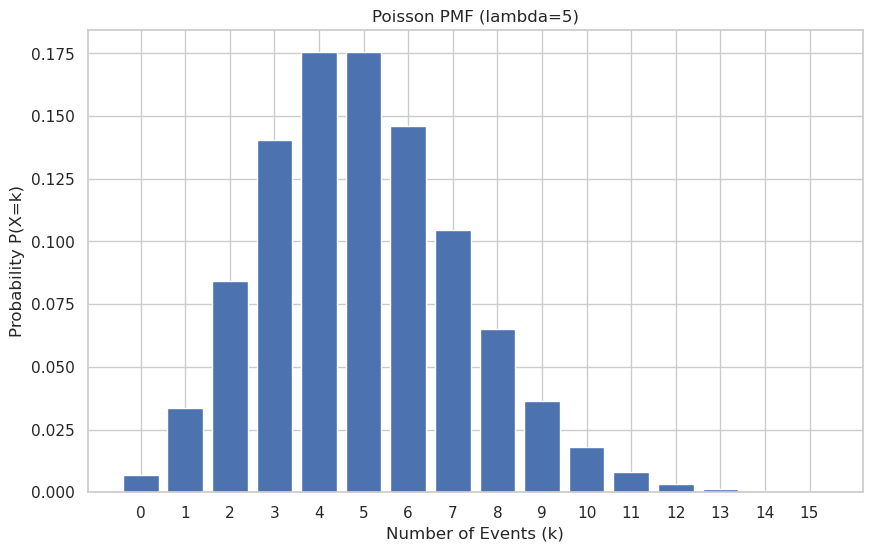

In [40]:
plt.bar(k_values, pmf_values)
plt.title(f"Poisson PMF (lambda={lambda_rate})")
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability P(X=k)")
plt.xticks(k_values)
plt.show()

In [41]:
# Plotting the CDF
cdf_values = poisson_rv.cdf(k_values)

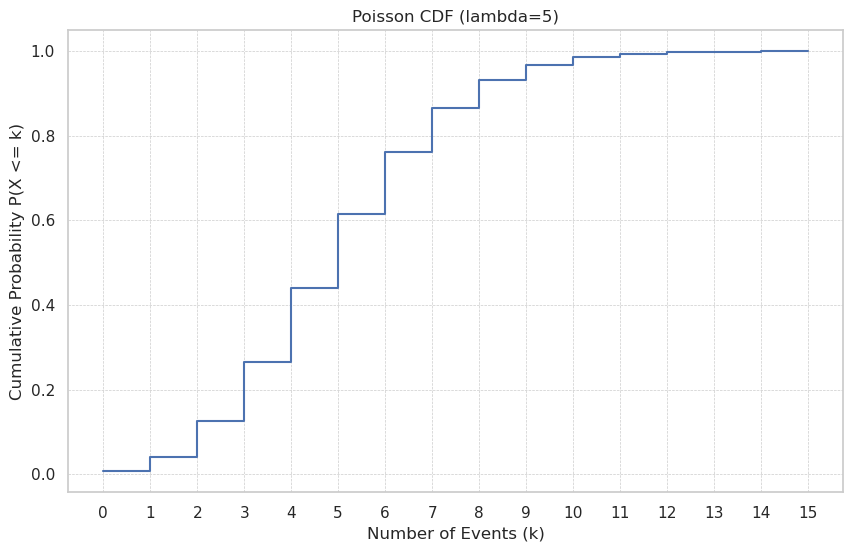

In [42]:
plt.step(k_values, cdf_values, where='post')
plt.title(f"Poisson CDF (lambda={lambda_rate})")
plt.xlabel("Number of Events (k)")
plt.ylabel("Cumulative Probability P(X <= k)")
plt.xticks(k_values)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

## 6. Hypergeometric Distribution

The Hypergeometric distribution models the number of successes in a sample drawn *without replacement* from a finite population containing a known number of successes. Contrast this with the Binomial, which assumes independence (sampling *with* replacement or from a very large population).

- **Scenario**: Number of winning lottery tickets in a handful drawn from a box, number of defective items in a sample taken from a small batch, number of Aces drawn in a 5-card poker hand from a standard deck.
- **Parameters**:
    - $N$: the total size of the population.
    - $K$: the total number of success items in the population.
    - $n$: the size of the sample drawn from the population ($n \le N$).
- **Random Variable**: $X$, the number of successes in the sample of size $n$. $X$ can take values $k$ such that $\max(0, n - (N-K)) \le k \le \min(n, K)$.

**PMF:**

$$ P(X=k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}} $$

This represents (ways to choose $k$ successes from $K$) * (ways to choose $n-k$ failures from $N-K$) / (total ways to choose $n$ items from $N$).

**Mean:** $E[X] = n \frac{K}{N}$
**Variance:** $Var(X) = n \frac{K}{N} \left(1 - \frac{K}{N}\right) \left(\frac{N-n}{N-1}\right)$
The term $\frac{N-n}{N-1}$ is the *finite population correction factor*. As $N \to \infty$, this factor approaches 1, and the Hypergeometric distribution approaches the Binomial distribution with $p = K/N$.

**Example:** Modeling the number of winning lottery tickets ($k$) in a sample of $n=10$ tickets drawn from a box containing $N=100$ tickets, where $K=20$ are winners.

In [43]:
# Using scipy.stats.hypergeom
N_population = 100 # Total tickets
K_successes_pop = 20 # Total winning tickets
n_sample = 10 # Sample size drawn

In [44]:
# M = N, n = K, N = n (in scipy's notation: M=population size, n=successes in pop, N=sample size)
hypergeom_rv = stats.hypergeom(M=N_population, n=K_successes_pop, N=n_sample)

In [45]:
# PMF: Probability of exactly k successes in the sample
k_successes_sample = 3
print(f"P(X={k_successes_sample} winning tickets in sample of {n_sample}): {hypergeom_rv.pmf(k_successes_sample):.4f}")

P(X=3 winning tickets in sample of 10): 0.2092


In [46]:
# CDF: Probability of k or fewer successes in the sample
k_or_fewer_sample = 2
print(f"P(X <= {k_or_fewer_sample} winning tickets in sample): {hypergeom_rv.cdf(k_or_fewer_sample):.4f}")
# Probability of more than k successes
print(f"P(X > {k_or_fewer_sample} winning tickets in sample): {1 - hypergeom_rv.cdf(k_or_fewer_sample):.4f}")
print(f"P(X > {k_or_fewer_sample} winning tickets in sample) (using sf): {hypergeom_rv.sf(k_or_fewer_sample):.4f}")

P(X <= 2 winning tickets in sample): 0.6812
P(X > 2 winning tickets in sample): 0.3188
P(X > 2 winning tickets in sample) (using sf): 0.3188


In [47]:
# Mean and Variance
print(f"\nMean (Expected number of winning tickets in sample): {hypergeom_rv.mean():.2f}")
print(f"Variance: {hypergeom_rv.var():.2f}")
print(f"Standard Deviation: {hypergeom_rv.std():.2f}")


Mean (Expected number of winning tickets in sample): 2.00
Variance: 1.45
Standard Deviation: 1.21


In [48]:
# Theoretical mean calculation for comparison
mean_theory = n_sample * (K_successes_pop / N_population)
print(f"Theoretical Mean: {mean_theory:.2f}")

Theoretical Mean: 2.00


In [49]:
# Generate random samples
n_simulations = 1000
samples = hypergeom_rv.rvs(size=n_simulations)
# print(f"\nSimulated number of winning tickets ({n_simulations} simulations): {samples[:20]}...")

In [50]:
# Plotting the PMF
# Determine possible k values: max(0, n-(N-K)) <= k <= min(n, K)
min_k = max(0, n_sample - (N_population - K_successes_pop))
max_k = min(n_sample, K_successes_pop)
k_values = np.arange(min_k, max_k + 1)
pmf_values = hypergeom_rv.pmf(k_values)

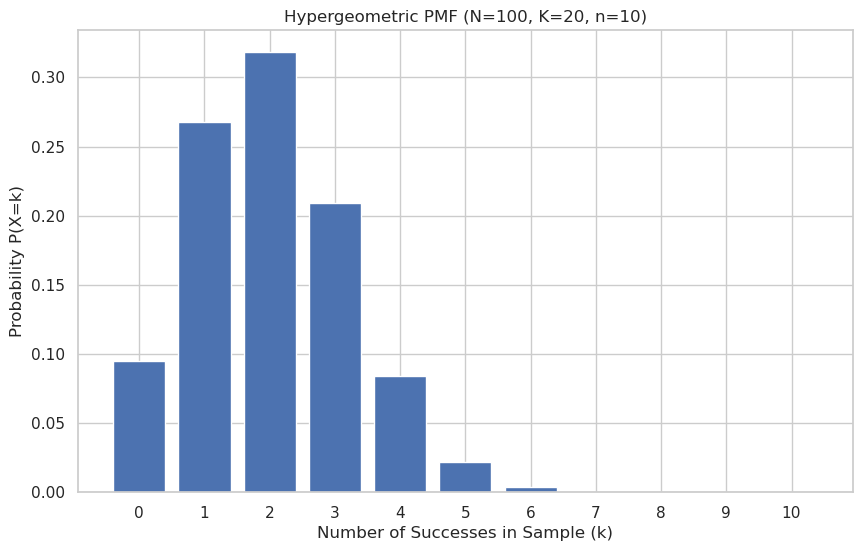

In [51]:
plt.bar(k_values, pmf_values)
plt.title(f"Hypergeometric PMF (N={N_population}, K={K_successes_pop}, n={n_sample})")
plt.xlabel("Number of Successes in Sample (k)")
plt.ylabel("Probability P(X=k)")
plt.xticks(k_values)
plt.show()

## 7. Relationships Between Distributions

Understanding the connections between these distributions can deepen insight and provide useful approximations.

1.  **Bernoulli as a special case of Binomial**: A Binomial distribution with $n=1$ trial ($Binomial(1, p)$) is equivalent to a Bernoulli distribution ($Bernoulli(p)$).

2.  **Geometric as a special case of Negative Binomial**: A Negative Binomial distribution modeling the number of trials until the first success ($r=1$) ($NegativeBinomial(1, p)$) is equivalent to a Geometric distribution ($Geometric(p)$).

3.  **Binomial Approximation to Hypergeometric**: If the population size $N$ is much larger than the sample size $n$ (e.g., $N > 20n$), then drawing without replacement (Hypergeometric) is very similar to drawing with replacement. In this case, the Hypergeometric($N, K, n$) distribution can be well-approximated by the Binomial($n, p=K/N$) distribution. The finite population correction factor $\frac{N-n}{N-1}$ approaches 1.

4.  **Poisson Approximation to Binomial**: If the number of trials $n$ in a Binomial distribution is large, and the success probability $p$ is small, such that the mean $\lambda = np$ is moderate, then the Binomial($n, p$) distribution can be well-approximated by the Poisson($\lambda = np$) distribution. This is useful because the Poisson PMF is often easier to compute than the Binomial PMF when $n$ is large. A common rule of thumb is to use this approximation if $n \ge 20$ and $p \le 0.05$, or $n \ge 100$ and $np \le 10$.

**Example: Poisson approximation to Binomial**
Consider $Binomial(n=1000, p=0.005)$. Here $n$ is large, $p$ is small. The mean is $\lambda = np = 1000 \times 0.005 = 5$. We can approximate this with $Poisson(\lambda=5)$.

In [52]:
n_binom_approx = 1000
p_binom_approx = 0.005
lambda_approx = n_binom_approx * p_binom_approx

In [53]:
binom_rv_approx = stats.binom(n=n_binom_approx, p=p_binom_approx)
poisson_rv_approx = stats.poisson(mu=lambda_approx)

In [54]:
# Compare PMFs for a few values of k
k_vals_compare = np.arange(0, 15)
binom_pmf = binom_rv_approx.pmf(k_vals_compare)
poisson_pmf = poisson_rv_approx.pmf(k_vals_compare)

In [55]:
print(f"Comparing Binomial(n={n_binom_approx}, p={p_binom_approx}) and Poisson(lambda={lambda_approx:.1f})")
print("k\tBinomial P(X=k)\tPoisson P(X=k)\tDifference")
for k, bp, pp in zip(k_vals_compare, binom_pmf, poisson_pmf):
    print(f"{k}\t{bp:.6f}\t{pp:.6f}\t{abs(bp-pp):.6f}")

Comparing Binomial(n=1000, p=0.005) and Poisson(lambda=5.0)
k	Binomial P(X=k)	Poisson P(X=k)	Difference
0	0.006654	0.006738	0.000084
1	0.033437	0.033690	0.000253
2	0.083929	0.084224	0.000296
3	0.140303	0.140374	0.000071
4	0.175731	0.175467	0.000264
5	0.175908	0.175467	0.000440
6	0.146590	0.146223	0.000367
7	0.104602	0.104445	0.000157
8	0.065245	0.065278	0.000033
9	0.036138	0.036266	0.000128
10	0.017996	0.018133	0.000137
11	0.008139	0.008242	0.000103
12	0.003371	0.003434	0.000063
13	0.001287	0.001321	0.000034
14	0.000456	0.000472	0.000016


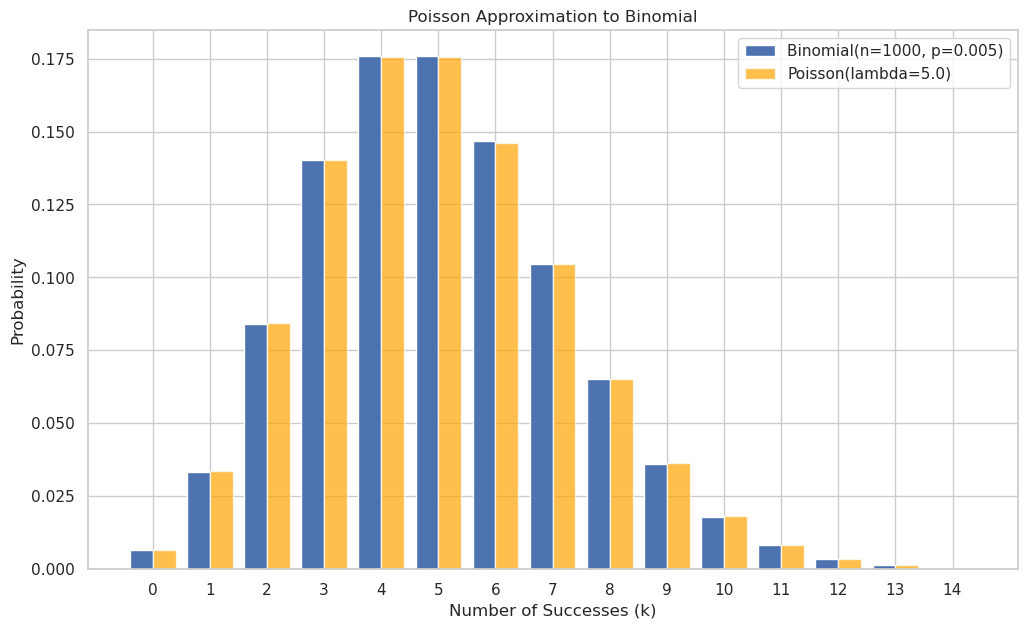

In [56]:
# Plotting the comparison
plt.figure(figsize=(12, 7))
plt.bar(k_vals_compare - 0.2, binom_pmf, width=0.4, label=f'Binomial(n={n_binom_approx}, p={p_binom_approx})', align='center')
plt.bar(k_vals_compare + 0.2, poisson_pmf, width=0.4, label=f'Poisson(lambda={lambda_approx:.1f})', align='center', color='orange', alpha=0.7)
plt.title("Poisson Approximation to Binomial")
plt.xlabel("Number of Successes (k)")
plt.ylabel("Probability")
plt.xticks(k_vals_compare)
plt.legend()
plt.show()

## 8. Hands-on Exercises

Now, let's apply what we've learned using `scipy.stats`.

**Exercise 1: Customer Arrivals**
The average number of customers arriving at a small cafe is 10 per hour. Assume arrivals follow a Poisson distribution.
a) What is the probability that exactly 8 customers arrive in a given hour?
b) What is the probability that 12 or fewer customers arrive in a given hour?
c) What is the probability that more than 15 customers arrive in a given hour?
d) Simulate 1000 hours of customer arrivals and plot a histogram of the results. Compare it to the theoretical PMF.

**Exercise 2: Quality Control**
A batch contains 50 items, of which 5 are defective. You randomly sample 8 items without replacement.
a) What distribution models the number of defective items in your sample? State the parameters.
b) What is the probability that exactly 1 item in your sample is defective?
c) What is the probability that at most 2 items in your sample are defective?
d) What is the expected number of defective items in your sample?

**Exercise 3: Website Success**
A new website feature has a 3% chance of being used by a visitor ($p=0.03$). Assume visitors are independent.
a) If 100 visitors come to the site, what is the probability that exactly 3 visitors use the feature? What distribution applies?
b) What is the probability that 5 or fewer visitors use the feature out of 100?
c) What is the expected number of users out of 100 visitors?
d) A developer tests the feature repeatedly until the first user successfully uses it. What is the probability that the first success occurs on the 20th visitor? What distribution applies?
e) What is the expected number of visitors needed to see the first success?
f) How many visitors are expected until the 5th user is observed? What distribution applies?

In [57]:
# Exercise 1: Customer Arrivals (Poisson)
lambda_cafe = 10
cafe_rv = stats.poisson(mu=lambda_cafe)

In [58]:
# a) P(X=8)
prob_8 = cafe_rv.pmf(8)
print(f"1a) P(Exactly 8 customers) = {prob_8:.4f}")

1a) P(Exactly 8 customers) = 0.1126


In [59]:
# b) P(X <= 12)
prob_12_or_fewer = cafe_rv.cdf(12)
print(f"1b) P(12 or fewer customers) = {prob_12_or_fewer:.4f}")

1b) P(12 or fewer customers) = 0.7916


In [60]:
# c) P(X > 15) = 1 - P(X <= 15) or sf(15)
prob_over_15 = cafe_rv.sf(15)
print(f"1c) P(More than 15 customers) = {prob_over_15:.4f}")

1c) P(More than 15 customers) = 0.0487


In [61]:
# d) Simulation
n_sim_hours = 1000
sim_arrivals = cafe_rv.rvs(size=n_sim_hours)

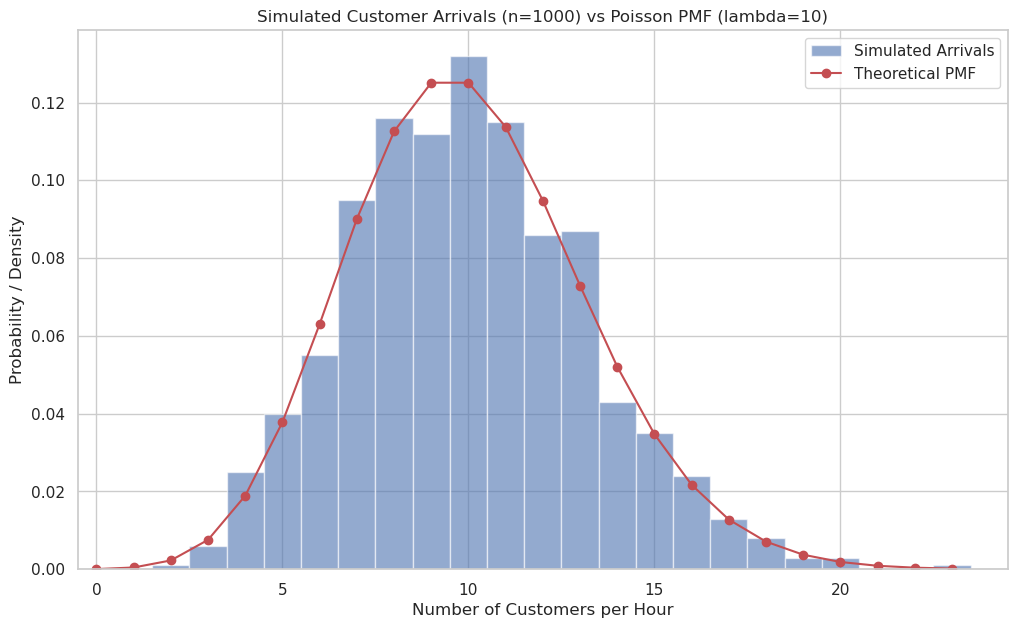

In [62]:
plt.figure(figsize=(12, 7))
max_observed = np.max(sim_arrivals)
bins = np.arange(0, max_observed + 2) - 0.5 # Center bins on integers
plt.hist(sim_arrivals, bins=bins, density=True, alpha=0.6, label='Simulated Arrivals')

# Overlay theoretical PMF
k_vals_cafe = np.arange(0, max_observed + 1)
pmf_cafe = cafe_rv.pmf(k_vals_cafe)
plt.plot(k_vals_cafe, pmf_cafe, 'ro-', label='Theoretical PMF')

plt.title(f'Simulated Customer Arrivals (n={n_sim_hours}) vs Poisson PMF (lambda={lambda_cafe})')
plt.xlabel('Number of Customers per Hour')
plt.ylabel('Probability / Density')
plt.legend()
plt.xlim(-0.5, max_observed + 1.5)
plt.show()

In [63]:
# Exercise 2: Quality Control (Hypergeometric)
N_qc = 50 # Population size
K_qc = 5  # Successes in population (defectives)
n_qc = 8  # Sample size

In [64]:
# a) Distribution: Hypergeometric(M=50, n=5, N=8) using scipy notation
qc_rv = stats.hypergeom(M=N_qc, n=K_qc, N=n_qc)
print(f"2a) Distribution: Hypergeometric(N={N_qc}, K={K_qc}, n={n_qc})")

2a) Distribution: Hypergeometric(N=50, K=5, n=8)


In [65]:
# b) P(X=1)
prob_1_defective = qc_rv.pmf(1)
print(f"2b) P(Exactly 1 defective in sample) = {prob_1_defective:.4f}")

2b) P(Exactly 1 defective in sample) = 0.4226


In [66]:
# c) P(X <= 2)
prob_at_most_2 = qc_rv.cdf(2)
print(f"2c) P(At most 2 defectives in sample) = {prob_at_most_2:.4f}")

2c) P(At most 2 defectives in sample) = 0.9758


In [67]:
# d) Expected number of defectives E[X] = n * (K/N)
expected_defective = qc_rv.mean()
print(f"2d) Expected number of defectives in sample = {expected_defective:.4f}")
# Theoretical check: 8 * (5 / 50) = 8 * 0.1 = 0.8

2d) Expected number of defectives in sample = 0.8000


In [68]:
# Exercise 3: Website Success (Binomial, Geometric, Negative Binomial)
p_ws = 0.03 # Probability of success (using feature)
n_ws = 100 # Number of visitors (trials)

In [69]:
# a) P(X=3) out of 100. Distribution: Binomial(n=100, p=0.03)
ws_binom_rv = stats.binom(n=n_ws, p=p_ws)
prob_3_users = ws_binom_rv.pmf(3)
print(f"3a) Distribution: Binomial(n={n_ws}, p={p_ws}). P(Exactly 3 users) = {prob_3_users:.4f}")

3a) Distribution: Binomial(n=100, p=0.03). P(Exactly 3 users) = 0.2275


In [70]:
# b) P(X <= 5) out of 100
prob_5_or_fewer = ws_binom_rv.cdf(5)
print(f"3b) P(5 or fewer users) = {prob_5_or_fewer:.4f}")

3b) P(5 or fewer users) = 0.9192


In [71]:
# c) Expected users out of 100: E[X] = n*p
expected_users = ws_binom_rv.mean()
print(f"3c) Expected number of users = {expected_users:.2f}")

3c) Expected number of users = 3.00


In [72]:
# d) P(First success on 20th visitor). Distribution: Geometric(p=0.03)
# Remember scipy.geom counts failures *before* first success. Trial 20 means 19 failures.
ws_geom_rv = stats.geom(p=p_ws)
prob_first_on_20 = ws_geom_rv.pmf(19) # k=19 failures
print(f"3d) Distribution: Geometric(p={p_ws}). P(First success on trial 20) = {prob_first_on_20:.4f}")

3d) Distribution: Geometric(p=0.03). P(First success on trial 20) = 0.0173


In [73]:
# e) Expected visitors for first success: E[X] = 1/p
expected_trials_geom = 1 / p_ws
# Using scipy mean (failures) + 1: ws_geom_rv.mean() + 1
print(f"3e) Expected visitors until first success = {expected_trials_geom:.2f}")

3e) Expected visitors until first success = 33.33


In [74]:
# f) Expected visitors for 5th success. Distribution: Negative Binomial(r=5, p=0.03)
# Expected trials E[X] = r/p
r_ws = 5
expected_trials_nbinom = r_ws / p_ws
# Using scipy mean (failures) + r: stats.nbinom(n=r_ws, p=p_ws).mean() + r_ws
print(f"3f) Distribution: Negative Binomial(r={r_ws}, p={p_ws}). Expected visitors until 5th success = {expected_trials_nbinom:.2f}")

3f) Distribution: Negative Binomial(r=5, p=0.03). Expected visitors until 5th success = 166.67


## Summary

In this chapter, we explored six fundamental discrete probability distributions:

* **Bernoulli**: Single trial, two outcomes (Success/Failure).
* **Binomial**: Fixed number of independent trials, counts successes.
* **Geometric**: Number of trials until the *first* success.
* **Negative Binomial**: Number of trials until a *fixed number* ($r$) of successes.
* **Poisson**: Number of events in a fixed interval of time/space, given an average rate.
* **Hypergeometric**: Number of successes in a sample drawn *without* replacement from a finite population.

We learned the scenarios each distribution models, their parameters, PMFs, means, and variances. Critically, we saw how to leverage `scipy.stats` functions (`pmf`, `cdf`, `rvs`, `mean`, `var`, `std`, `sf`) to perform calculations, generate simulations, and visualize these distributions. We also discussed important relationships, such as the Poisson approximation to the Binomial and the Binomial approximation to the Hypergeometric.

Mastering these distributions provides a powerful toolkit for modeling various random phenomena encountered in data analysis, science, engineering, and business. In the next chapters, we will transition to continuous random variables and their corresponding common distributions.